This is an expample to show how uncertainty can impact project decisions by using maonte carlos method, along with two Probability Density Functions (triangle distribution and normal distribution)
There are two input data point for project evaluation:
1. Cost ( how much it cost to implement it? )
2. Time ( how long it takes to finish project)

We pick 10 options, with 10 unique values of Cost/Time pair for a project.
Then we apply to Probability Density Functions to existing decisions ( this already been done in excel dataset ). We pick two instinct PDF
1. triangle distribution(https://en.wikipedia.org/wiki/Triangular_distribution): data falls into two variables a & b
2. normal distribution(https://en.wikipedia.org/wiki/Normal_distribution)- Most common, describes many natural phenomena. 

Next step, we did Monte Carlos method to convert model point assumptions into probability distributions. We run it 1000 times by sampling random variables each time. From this way, we can see how uncertainty impact existing data.

Finally, each data point is show on x,y axis as a distribute heatmaps to show the impacted area. 

In [10]:
#import library
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as mpatches

In [31]:
# read in Monte Carlos data with two PDFs applied to our 10 options
df = pd.DataFrame()
index=1
dataframe = []
dataframe.append(None)
for index in range(9):
    index=index+1
    dataframe.append(pd.read_excel("uncertainty.xlsx", sheet_name="Option %d"%index))
    df['Monte Carlos Time %d'%index]=dataframe[index]['Monte Carlo Time']
    df['Monte Carlos Cost %d'%index]=dataframe[index]['Monte Carlo Cost']

In [22]:
df.describe()

,Monte Carlos Time 1,Monte Carlos Cost 1,Monte Carlos Time 2,Monte Carlos Cost 2,Monte Carlos Time 3,Monte Carlos Cost 3,Monte Carlos Time 4,Monte Carlos Cost 4,Monte Carlos Time 5,Monte Carlos Cost 5,Monte Carlos Time 6,Monte Carlos Cost 6,Monte Carlos Time 7,Monte Carlos Cost 7,Monte Carlos Time 8,Monte Carlos Cost 8,Monte Carlos Time 9,Monte Carlos Cost 9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.746200,16.714497,0.794199,15.840787,0.811370,17.155089,0.760034,14.511977,0.792589,15.478961,0.721341,17.142011,0.776073,13.509354,0.781027,18.864221,0.708136,17.513531
std,0.022451,0.846608,0.024285,0.654843,0.025382,0.674915,0.021089,0.649652,0.025263,1.087018,0.032479,0.812343,0.024554,0.660574,0.025571,0.888507,0.036440,0.894727
min,0.688560,14.372169,0.716084,13.718916,0.732391,15.022449,0.698346,12.769977,0.705377,11.669330,0.616009,14.293593,0.693334,11.662944,0.685153,16.125713,0.556662,14.985683
25%,0.730434,16.121489,0.777514,15.379378,0.793565,16.691965,0.745708,14.050027,0.775603,14.750035,0.698810,16.565723,0.759517,13.040311,0.764202,18.253887,0.685261,16.900009
50%,0.745613,16.734722,0.796980,15.807258,0.812670,17.126814,0.762627,14.477601,0.794790,15.448416,0.724407,17.143431,0.776698,13.454472,0.782381,18.842086,0.710499,17.475709
75%,0.761347,17.328344,0.812207,16.279844,0.830175,17.567613,0.775187,14.935423,0.810482,16.175641,0.743691,17.651518,0.793547,13.974952,0.799665,19.491169,0.734036,18.156417
max,0.810816,19.056425,0.853678,17.838758,0.871357,19.167623,0.810006,16.745514,0.863644,18.876529,0.803898,19.736290,0.833844,15.508261,0.851440,22.028272,0.800422,20.487862


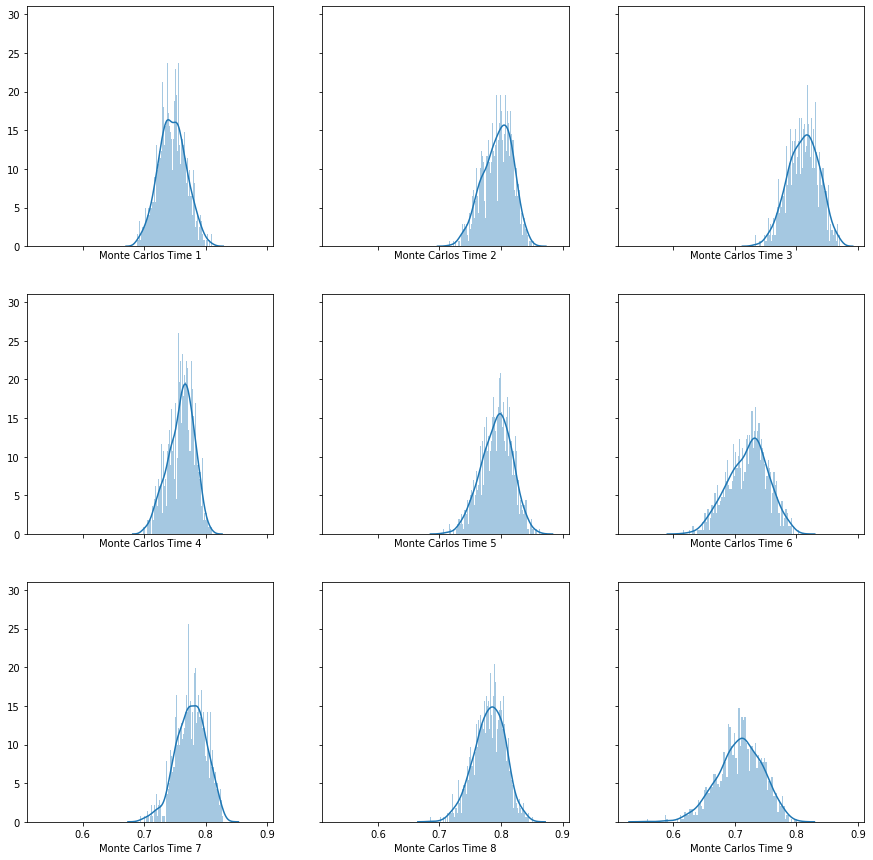

In [30]:
#use histograms to see outcomes after two Analysis to see how two different distribution combined impacts Time

fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True, sharey=True)
fig.set_size_inches(15, 15)

index = 0
for index in range(9):
    index=index+1
    sns.distplot(df['Monte Carlos Time %d'%index],bins=100, ax=axs[int((index-1)/3)][(index-1)%3])

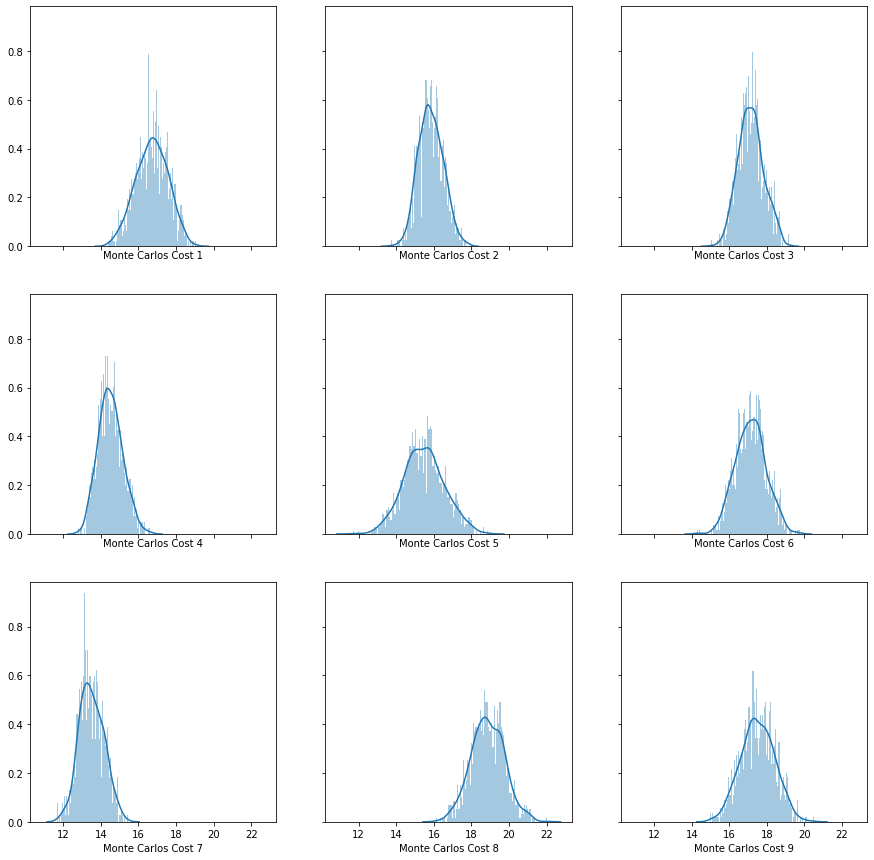

In [32]:
#use histograms to see outcomes after two Analysis to see how two different distribution combined impacts Cost

fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True, sharey=True)
fig.set_size_inches(15, 15)

index = 0
for index in range(9):
    index=index+1
    sns.distplot(df['Monte Carlos Cost %d'%index],bins=100, ax=axs[int((index-1)/3)][(index-1)%3])

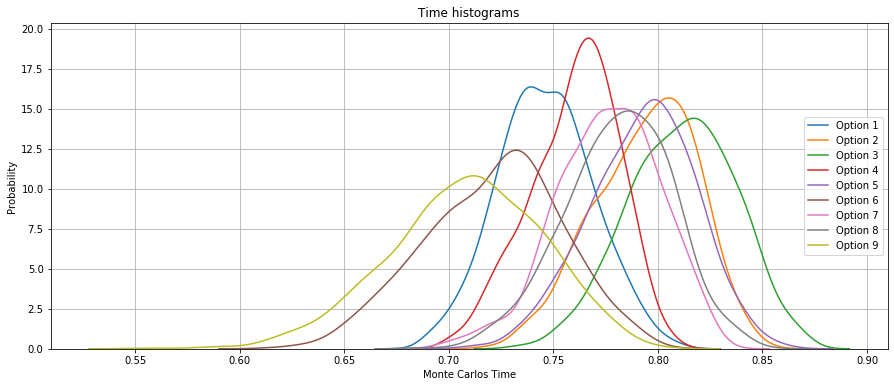

In [33]:
#merge all time histogram together to see the variance difference

fig, ax = plt.subplots(figsize=(15,6))

index = 0
for index in range(9):
    index=index+1
    sns.kdeplot(df['Monte Carlos Time %d'%index],label='Option %d'%index)

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Time histograms')
ax.set_xlabel('Monte Carlos Time')
ax.set_ylabel('Probability')

plt.show()

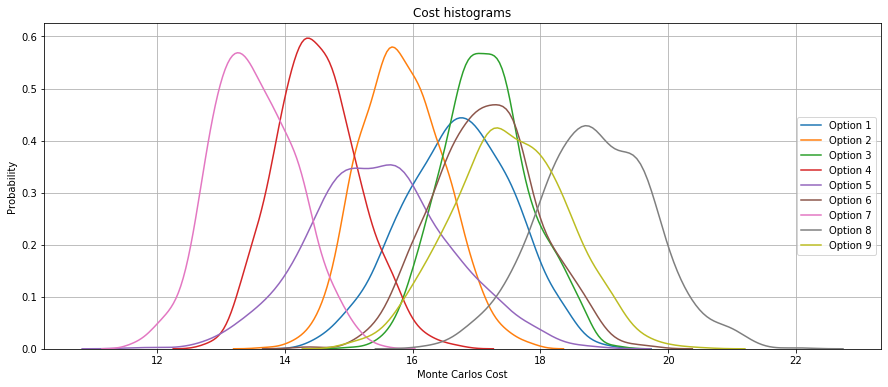

In [34]:
#merge all cost histogram together to see the variance difference

fig, ax = plt.subplots(figsize=(15,6))

index = 0
for index in range(9):
    index=index+1
    sns.kdeplot(df['Monte Carlos Cost %d'%index],label='Option %d'%index)
    
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cost histograms')
ax.set_xlabel('Monte Carlos Cost')
ax.set_ylabel('Probability')

plt.show()

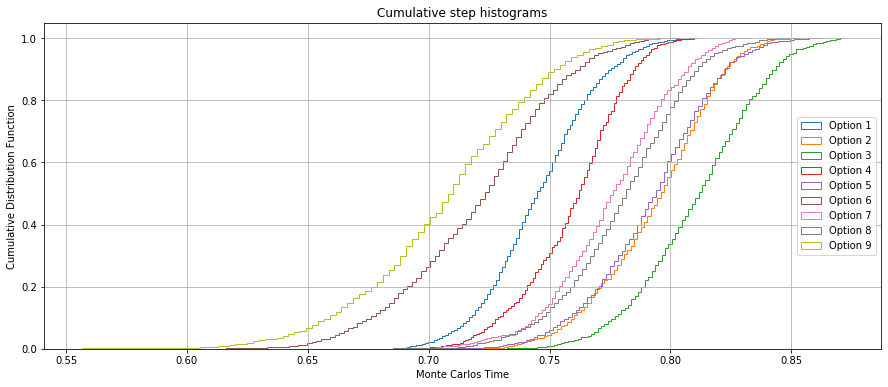

In [41]:
#Show Cumulative Distribution Function of Time, the integral of pdf, 

fig, ax = plt.subplots(figsize=(15, 6))

index = 0
for index in range(9):
    index=index+1
    ax.hist(df['Monte Carlos Time %d'%index], 100, density=True, histtype='step',
                           cumulative=True, label='Option %d'%index)

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Monte Carlos Time')
ax.set_ylabel('Cumulative Distribution Function')

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
fix_hist_step_vertical_line_at_end(ax)

plt.show()

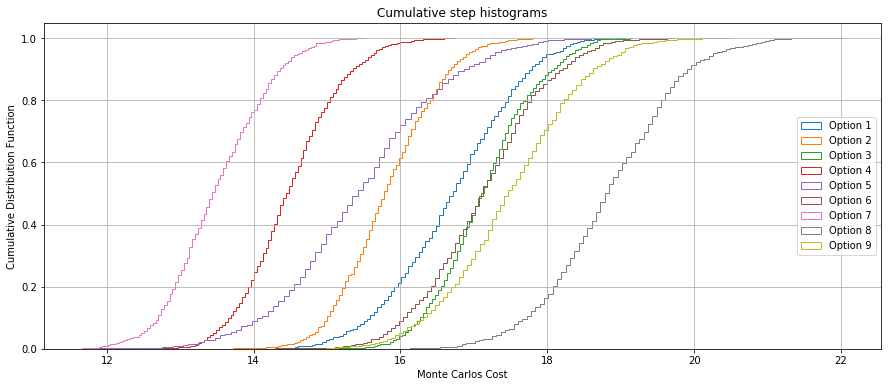

In [42]:
#Show Cumulative Distribution Function of Cost, the integral of pdf

fig, ax = plt.subplots(figsize=(15, 6))

index = 0
for index in range(9):
    index=index+1
    ax.hist(df['Monte Carlos Cost %d'%index], 100, density=True, histtype='step',
                           cumulative=True, label='Option %d'%index)

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Monte Carlos Cost')
ax.set_ylabel('Cumulative Distribution Function')


def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])
        
fix_hist_step_vertical_line_at_end(ax)


plt.show()

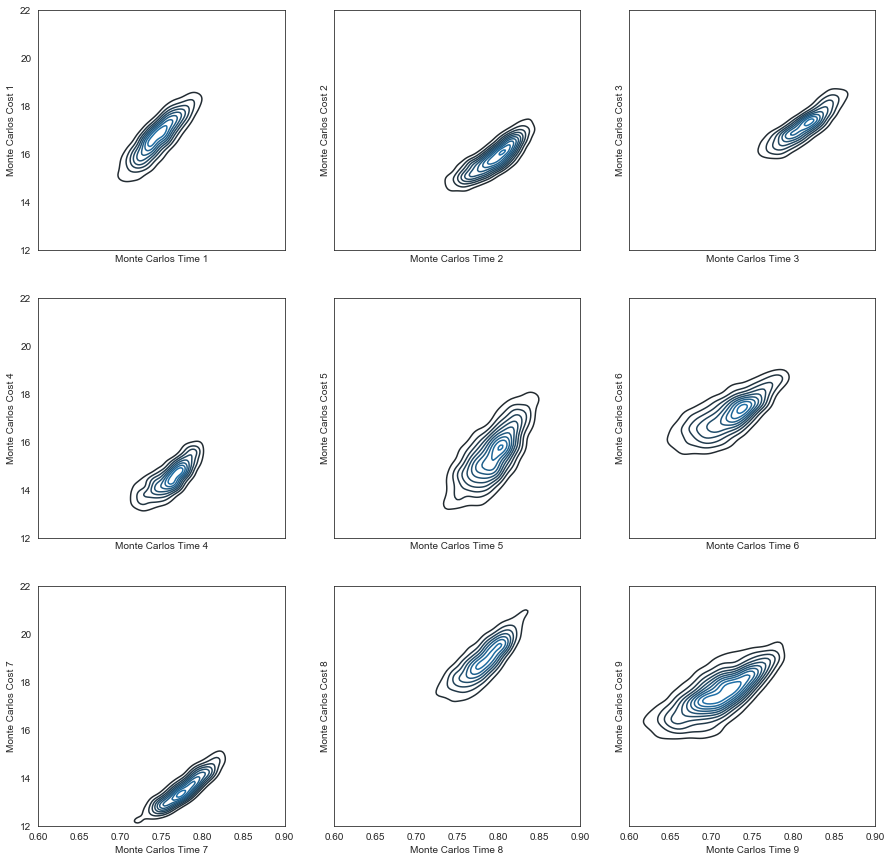

In [43]:
#show how conbined monte carlos result in 10 options separately

sns.set_style(style='white')
fig,axs = plt.subplots(nrows=3,ncols=3,sharex=True, sharey=True)
fig.set_size_inches(15, 15)
plt.ylim(12, 22)
plt.xlim(0.6, 0.9)
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

index = 0
for index in range(9):
    index=index+1
    sns.kdeplot(df['Monte Carlos Time %d'%index],df['Monte Carlos Cost %d'%index],ax=axs[int((index-1)/3)][(index-1)%3])


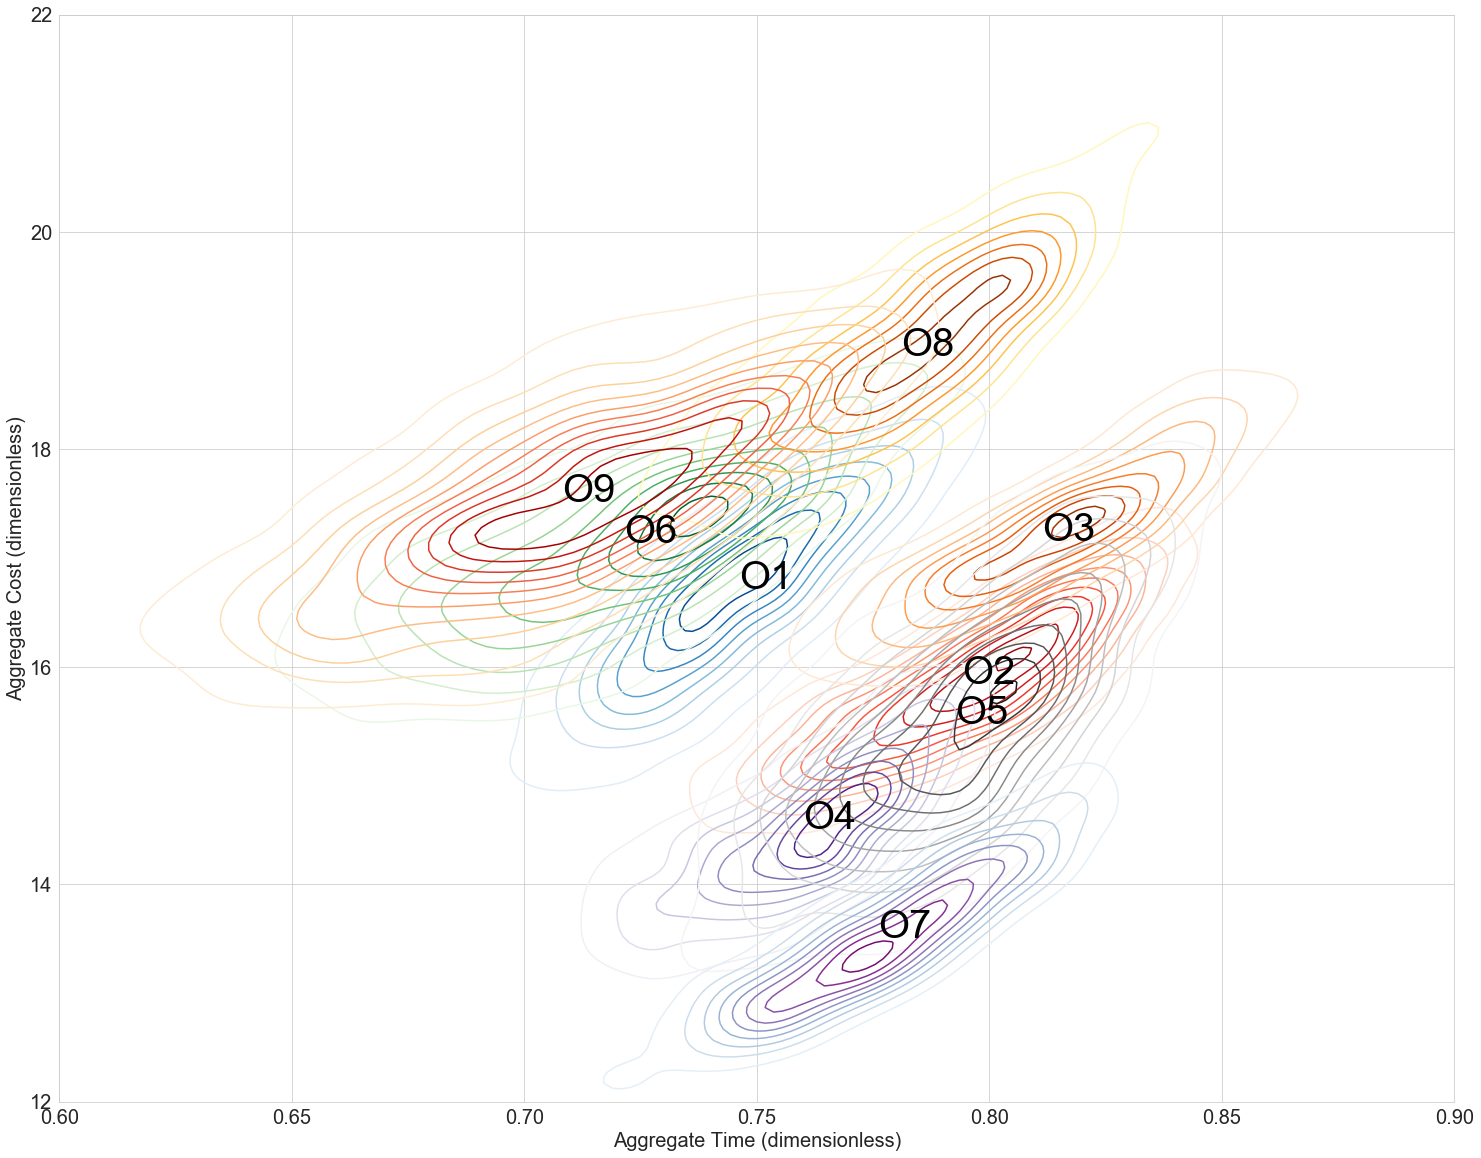

In [49]:
#combined them together in one graph. The red labels (O1 through O9) reflect the uncertainty distribution, both in cost and time of the 1000 Monte Carlo simulations run. 
clist = ["placeholer","Blues","Reds","Oranges","Purples","Greys","Greens", "BuPu","YlOrBr","OrRd"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(25, 20))


index = 0
for index in range(9):
    index=index+1
    sns.kdeplot(df['Monte Carlos Time %d'%index],df['Monte Carlos Cost %d'%index], cmap=clist[index], ax=ax)
    ax.text(df['Monte Carlos Time %d'%index].mean(), df['Monte Carlos Cost %d'%index].mean(), 'O%d'%index, fontsize=40, color='black')

ax.grid(True)
plt.ylim(12, 22)
plt.xlim(0.6, 0.9)
ax.set_xlabel('Aggregate Time (dimensionless)', fontsize=20)
ax.set_ylabel('Aggregate Cost (dimensionless)', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.show()
